<a href="https://colab.research.google.com/github/ckckck1373/LearnPytorch/blob/master/(%E8%8E%AB%E7%85%A91)RegressionEx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

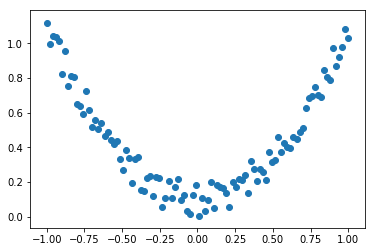

In [3]:
import torch
from torch.autograd import Variable #for backward prop.
import torch.nn.functional as F #激勵函數
import matplotlib.pyplot as plt

#fake data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)# x data(temsor), shape=(100, 1)
#torch 只能處理2維以上的 ex:[[1, 2, 3, 4]] 
#unsqueeze 把1維變2維
y = x.pow(2) + 0.2*torch.rand(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


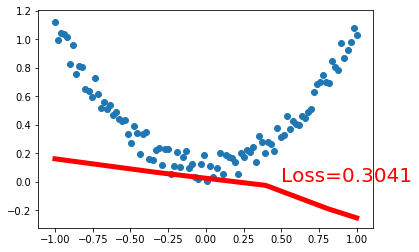

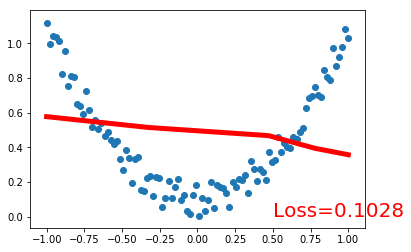

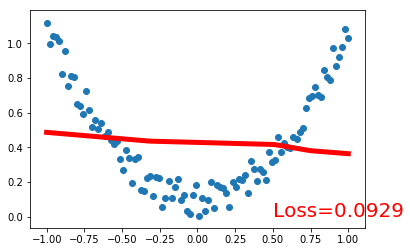

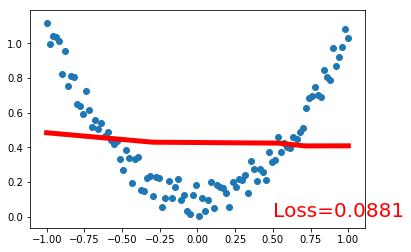

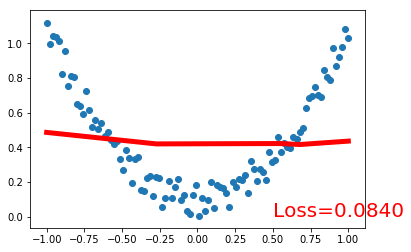

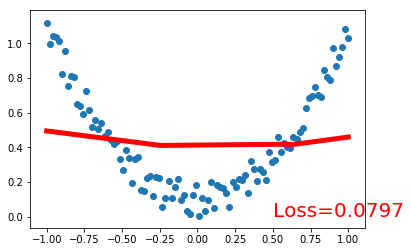

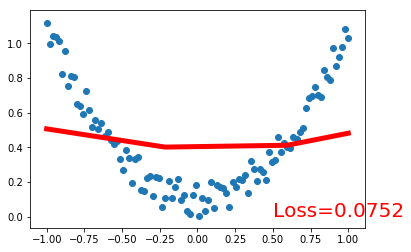

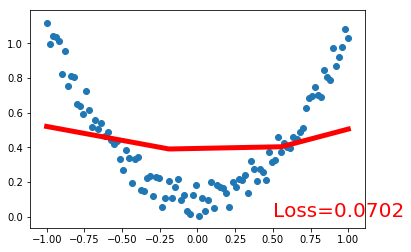

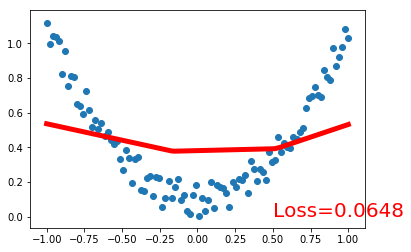

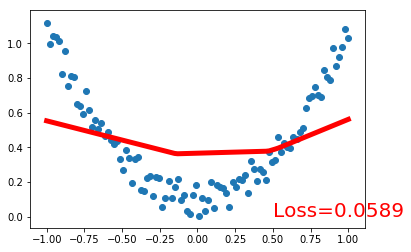

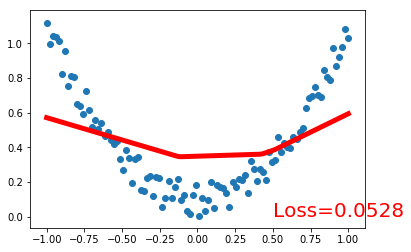

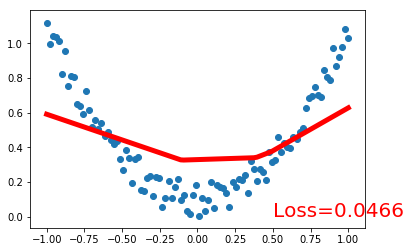

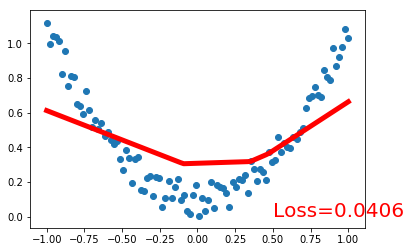

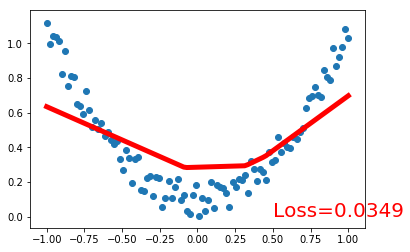

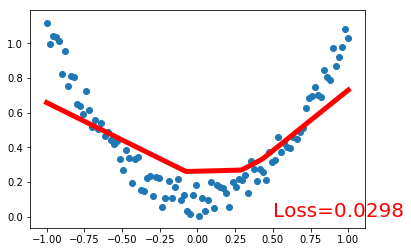

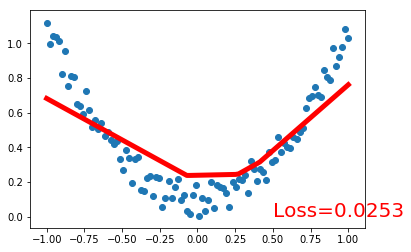

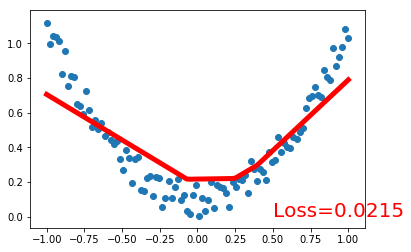

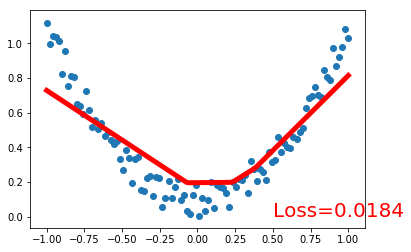

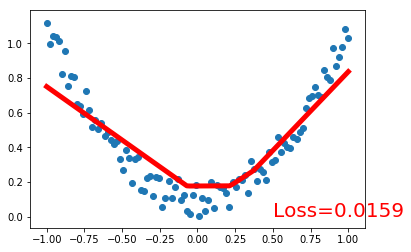

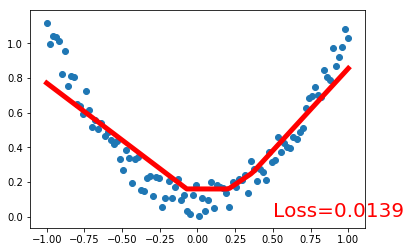

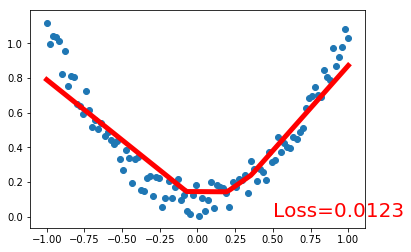

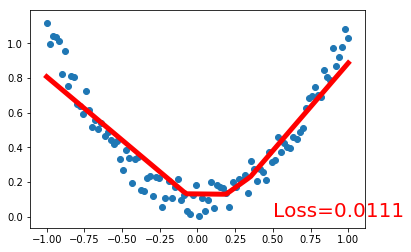

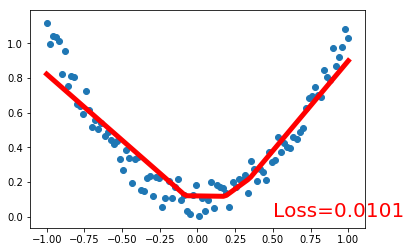

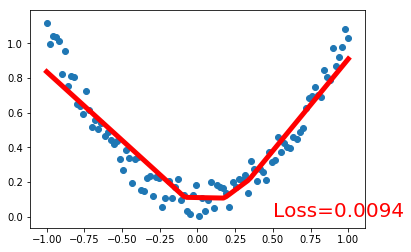

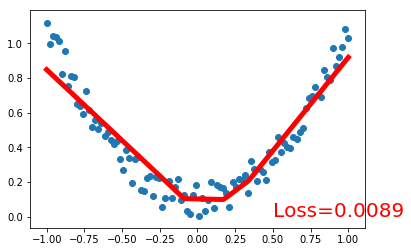

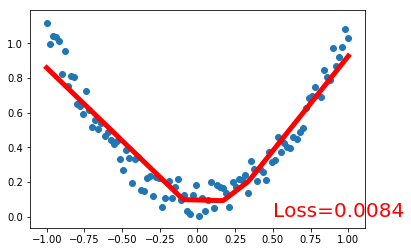

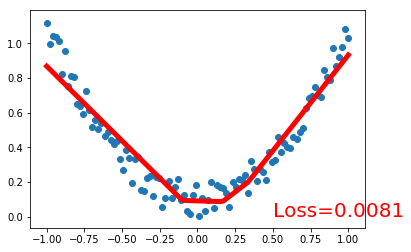

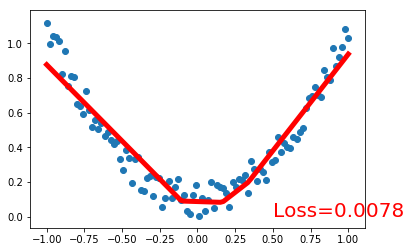

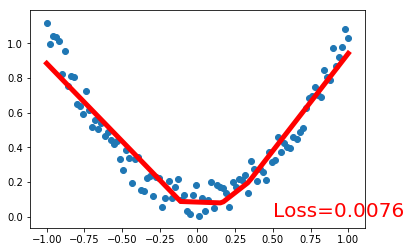

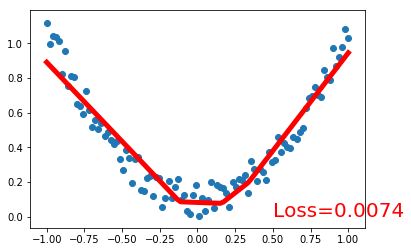

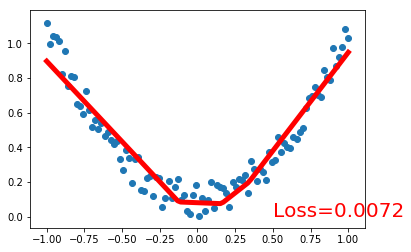

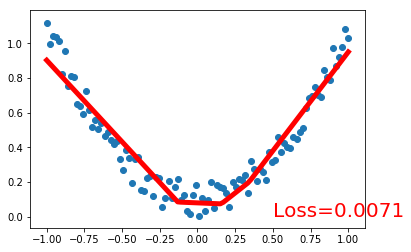

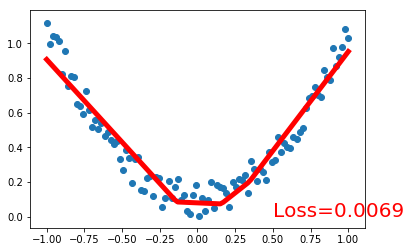

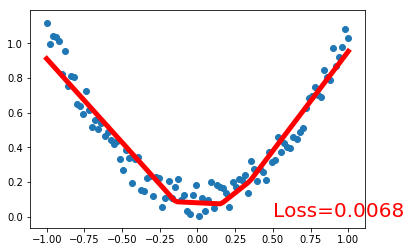

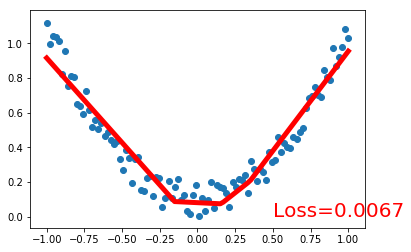

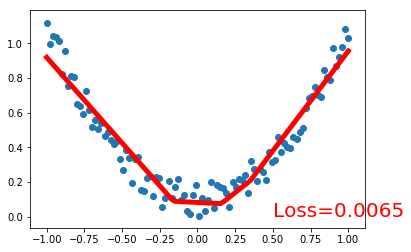

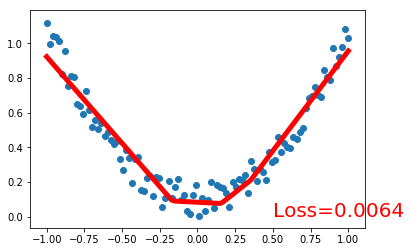

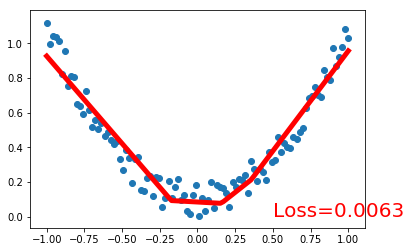

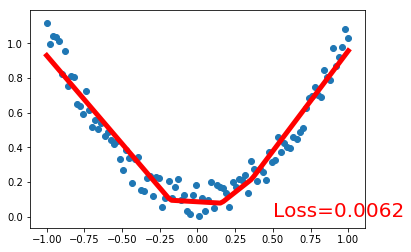

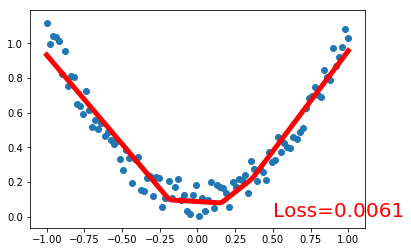

In [15]:
class Net(torch.nn.Module): #繼承Module的模塊
  def __init__(self, n_feature, n_hidden, n_output):
    super(Net, self).__init__() #官方步驟，繼承__init__ 功能
    self.hidden = torch.nn.Linear(n_feature, n_hidden) #影藏層線性輸出 
    self.predict = torch.nn.Linear(n_hidden, n_output) #n_output = 1 (預測一個y)
    
  
  def forward(self, x): #神經網路前向傳遞的流程圖，同時也是Module中的forward功能
    x = F.relu(self.hidden(x))
    x = self.predict(x) #不用激勵函數，因為某些data會被截斷
    return x 
  

net = Net(n_feature = 1,n_hidden =10, n_output= 1)
print(net)

plt.ion() #something about plotting 變成時時打印的功能
plt.show() 

#opt
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)#lr學習速率 
loss_func = torch.nn.MSELoss()#均方差 處理回歸問題(分類問題用其他的)

for t in range(200):
  prediction = net(x) #餵net訓練數據x，輸出預測值
  
  loss = loss_func(prediction, y) #計算兩者的誤差 (prediction, true)
  
  optimizer.zero_grad() #清空上一步的殘餘更新參數值
  loss.backward() #計算節點的梯度
  optimizer.step() #以學習效率來優化我們的parameter再施加到net上
  if t % 5 == 0:
    #plot and show learning process
    plt.cla()
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color': 'red'})
    plt.pause(0.1)
    
# plt.ioff()
# plt.show()
    